#**Steps to build a CNN Model For Yawn Detection**

## Step 1: Import all required libraries

In [1]:
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

## Step 2: Data Preprocessing

In [ ]:
def buildCNN(training_dataset, testing_dataset):
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

  training_set = train_datagen.flow_from_directory(training_dataset,
                                                  target_size = (64, 64),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

  test_datagen = ImageDataGenerator(rescale = 1./255)

  test_set = test_datagen.flow_from_directory(testing_dataset,
                                              target_size = (64, 64),
                                              batch_size = 32,
                                              class_mode = 'binary')

##Step 3 : Build CNN

In [ ]:
  cnn = tf.keras.models.Sequential()

  # Part 1 - Convolution
  cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

  # Part 2 - Pooling
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

  # Part 3 - Adding a second convolutional layer
  cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

  # Part 4 - Flattening
  cnn.add(tf.keras.layers.Flatten())

  # Part 5 - Full Connection
  cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

  # Part 6 - Output Layer
  cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Part 7 - Compiling the CNN
  cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Step 4 : Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
  cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

##Step 5 : Saving the CNN Model

In [ ]:
  cnn.save('yawn_model.h5')
  return True

#Step 6 : Making Code Modular
## All we have to do is pass in the training / testing data paths and we get a trained model as output.
## To do this, we simply wrap the entire build in a function.

# **If you already have a Model, start from here.**

#Step 7 : Load Model And Make A Single Prediction

In [2]:
cnn = tf.keras.models.load_model("yawn_model.h5")

## Code To Take a Picture In Google Colab

In [ ]:
def takepic(filename):
  from IPython.display import Image
  try:
    filename = take_photo(filename)
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

In [ ]:
def take_photo(filename, quality=1):
  from IPython.display import display, Javascript
  from google.colab.output import eval_js
  from base64 import b64decode

  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

##Code To Predict Output Of Image

In [4]:
def predict(img_path):
  test_image = tf.keras.utils.load_img(img_path, target_size = (64, 64))
  test_image = tf.keras.utils.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image/255.0)
  print(result[0][0])
  if(result > 0.5):
    return "Yawn"
  else:
    return "No yawn"

<IPython.core.display.Javascript object>

Saved to photo1.jpg


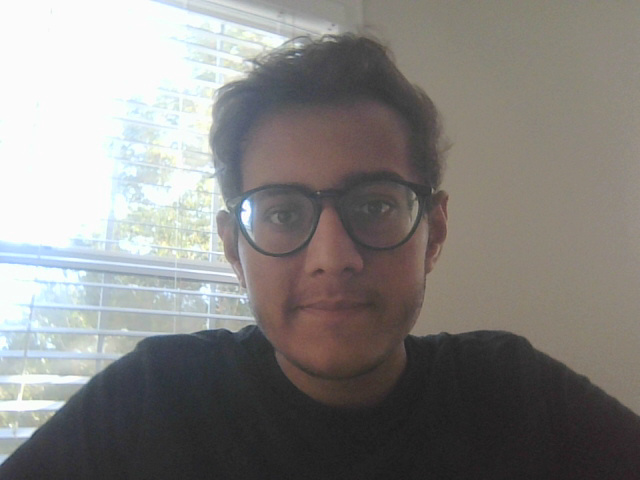

In [ ]:
takepic("photo1.jpg")

In [ ]:
predict("photo1.jpg")

1/1 [==============================] - 0s 19ms/step
0.25880852


'No yawn'

<IPython.core.display.Javascript object>

Saved to photo2.jpg


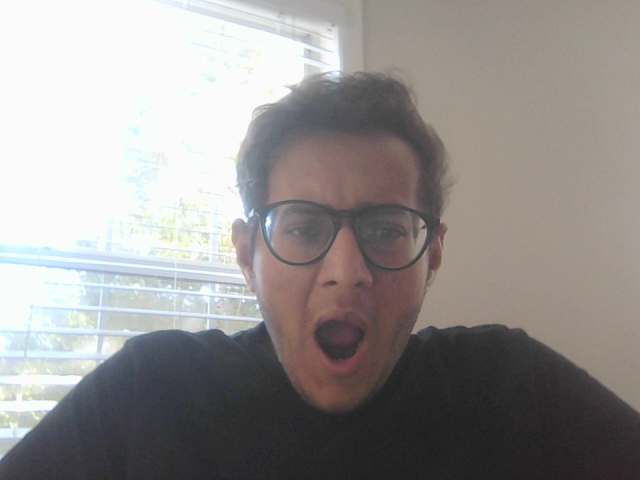

In [ ]:
takepic("photo2.jpg")

In [ ]:
predict("photo2.jpg")

1/1 [==============================] - 0s 18ms/step
0.804481


'Yawn'